In [1]:
import os
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
# Read CSV files concerning FGDOS sensor data logged using Breadboard Power Supply
file_s1_bb ='FGDOS_03F_PAYLOAD_MAIN_FUNC_TEST_NOISE_BACKUP_BB_POWER_Jun_14_19-25-23_s1.csv'
file_s2_bb ='FGDOS_03F_PAYLOAD_MAIN_FUNC_TEST_NOISE_BACKUP_BB_POWER_Jun_14_19-25-23_s2.csv'

print(file_s1_bb)
print(file_s2_bb)

df_s1_bb = pd.read_csv(r'E:\SPACEFLIGHT TU DELFT\THESIS\LUNAR ZEBRO\Assembly, Integration and Testing\Payload Functional Testing\Data logging and processing\Noise-14_06\MSP_CSV\corrected'+ '\\'+ file_s1_bb ,encoding='ISO-8859-1')
df_s2_bb = pd.read_csv(r'E:\SPACEFLIGHT TU DELFT\THESIS\LUNAR ZEBRO\Assembly, Integration and Testing\Payload Functional Testing\Data logging and processing\Noise-14_06\MSP_CSV\corrected'+ '\\'+ file_s2_bb ,encoding='ISO-8859-1')


FGDOS_03F_PAYLOAD_MAIN_FUNC_TEST_NOISE_BACKUP_BB_POWER_Jun_14_19-25-23_s1.csv
FGDOS_03F_PAYLOAD_MAIN_FUNC_TEST_NOISE_BACKUP_BB_POWER_Jun_14_19-25-23_s2.csv


In [3]:
# Read CSV files concerning FGDOS sensor data logged using Lab DC Power Supply
file_s1_lab ='FGDOS_03F_PAYLOAD_MAIN_FUNC_TEST_NOISE_BACKUP_LAB_POWER_Jun_14_20-12-55_s1.csv'
file_s2_lab ='FGDOS_03F_PAYLOAD_MAIN_FUNC_TEST_NOISE_BACKUP_LAB_POWER_Jun_14_20-12-55_s2.csv'

print(file_s1_lab)
print(file_s2_lab)

df_s1_lab = pd.read_csv(r'E:\SPACEFLIGHT TU DELFT\THESIS\LUNAR ZEBRO\Assembly, Integration and Testing\Payload Functional Testing\Data logging and processing\Noise-14_06\MSP_CSV\corrected'+ '\\'+ file_s1_lab ,encoding='ISO-8859-1')
df_s2_lab = pd.read_csv(r'E:\SPACEFLIGHT TU DELFT\THESIS\LUNAR ZEBRO\Assembly, Integration and Testing\Payload Functional Testing\Data logging and processing\Noise-14_06\MSP_CSV\corrected'+ '\\'+ file_s2_lab ,encoding='ISO-8859-1')


FGDOS_03F_PAYLOAD_MAIN_FUNC_TEST_NOISE_BACKUP_LAB_POWER_Jun_14_20-12-55_s1.csv
FGDOS_03F_PAYLOAD_MAIN_FUNC_TEST_NOISE_BACKUP_LAB_POWER_Jun_14_20-12-55_s2.csv


In [4]:
# Read CSV files containing the power measurement and temperature data from thermocouple
file_power_temp_bb = 'PAYLOAD_MAIN_FUNC_TEST_POWER_TEMP_BACKUP_BB_POWER_Jun_14_19-25-12.csv' # from breadboard power supply
file_power_temp_lab = 'PAYLOAD_MAIN_FUNC_TEST_POWER_TEMP_BACKUP_LAB_POWER_Jun_14_20-13-04.csv' # from lab DC power supply

print(file_power_temp_bb)
print(file_power_temp_lab)

df_power_bb = pd.read_csv(r'E:\SPACEFLIGHT TU DELFT\THESIS\LUNAR ZEBRO\Assembly, Integration and Testing\Payload Functional Testing\Data logging and processing\Noise-14_06\SAM_CSV\corrected'+ '\\'+ file_power_temp_bb ,encoding='ISO-8859-1')
df_power_lab = pd.read_csv(r'E:\SPACEFLIGHT TU DELFT\THESIS\LUNAR ZEBRO\Assembly, Integration and Testing\Payload Functional Testing\Data logging and processing\Noise-14_06\SAM_CSV\corrected'+ '\\'+ file_power_temp_lab ,encoding='ISO-8859-1')


PAYLOAD_MAIN_FUNC_TEST_POWER_TEMP_BACKUP_BB_POWER_Jun_14_19-25-12.csv
PAYLOAD_MAIN_FUNC_TEST_POWER_TEMP_BACKUP_LAB_POWER_Jun_14_20-13-04.csv


In [5]:
s1_bb = df_s1_bb.to_numpy()
s2_bb = df_s2_bb.to_numpy()
df_s1_bb.head()
df_s2_bb.head()
df_s1_bb.tail()
df_s2_bb.tail()

,Time (ms),Sensor,Temperature (° C),Sensor Frequency (Hz),Reference Frequency (Hz),Recharge Register,Window Factor,Sensitivity,Passive,Standby
878,1.273482e+06,2,89,79292,83213,0,7.63,h,0,0
879,1.274704e+06,2,89,79277,83213,0,7.63,h,0,0
880,1.275924e+06,2,89,79269,83221,0,7.63,h,0,0
881,1.277140e+06,2,89,79277,83213,0,7.63,h,0,0
882,1.278366e+06,2,89,79269,83229,0,7.63,h,0,0


In [31]:
s1_lab = df_s1_lab.to_numpy()
s2_lab = df_s2_lab.to_numpy()
df_s1_lab.head()
df_s2_lab.head()

df_s2_lab.tail()
df_s1_lab.tail()

,Time (ms),Sensor,Temperature (° C),Sensor Frequency (Hz),Reference Frequency (Hz),Recharge Register,Window Factor,Sensitivity,Passive,Standby
1127,1.622528e+06,1,90,80009,82809,0,7.63,h,0,0
1128,1.623759e+06,1,90,79994,82817,0,7.63,h,0,0
1129,1.624969e+06,1,90,80001,82817,0,7.63,h,0,0
1130,1.626208e+06,1,90,79986,82801,0,7.63,h,0,0
1131,1.627410e+06,1,90,80017,82801,0,7.63,h,0,0


In [7]:
bb_power = df_power_bb.to_numpy()
lab_power = df_power_lab.to_numpy()
df_power_bb.head()
df_power_lab.tail()

,Time (ns),Bus Voltage(V),Shunt Voltage(mV),Load Voltage(V),Current(mA),Power(mW),Hot Junction(C),Cold Junction(C),ADC(uV)
1601,1618396480800,4.98,0.91,4.98,9.1,46.0,24.0,24.25,-10
1602,1619414174400,4.98,0.83,4.98,8.4,43.0,24.0,24.25,-10
1603,1620415299300,4.99,0.84,4.99,8.3,43.0,24.0,24.00,-8
1604,1621426369300,4.98,0.83,4.98,8.3,41.0,24.0,24.25,-10
1605,1622434141300,4.98,0.83,4.98,8.4,43.0,24.0,24.00,-8


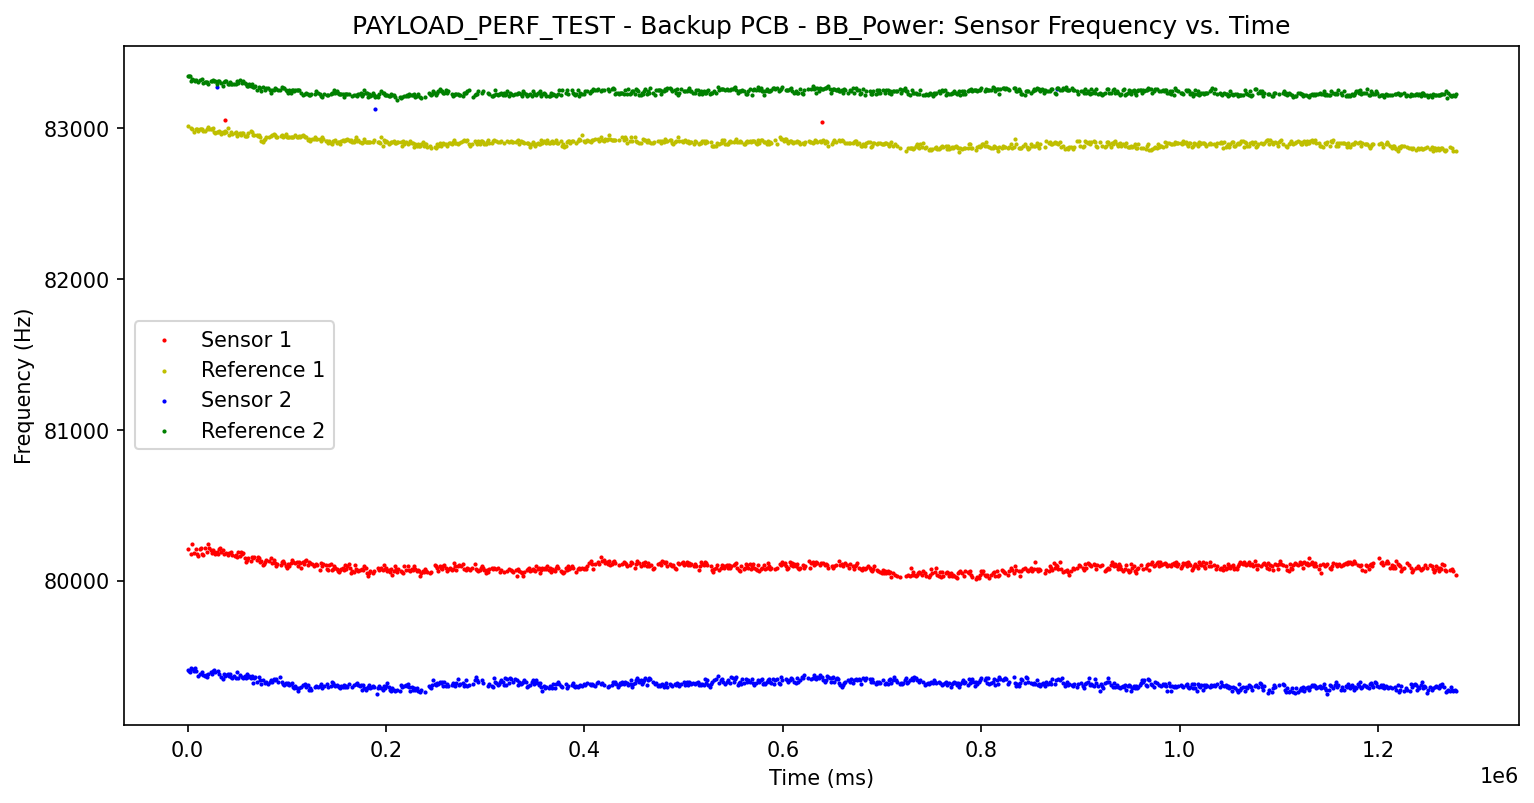

In [8]:
fig_sen_freq_bb = plt.figure(figsize=(12, 6), dpi=150)
plt.scatter(s1_bb[:,0], s1_bb[:,3],s=1, c='r',label = 'Sensor 1')
plt.scatter(s1_bb[:,0], s1_bb[:,4],s=1, c='y',label = 'Reference 1')
plt.scatter(s2_bb[:,0], s2_bb[:,3],s=1, c='b', label = 'Sensor 2')
plt.scatter(s2_bb[:,0], s2_bb[:,4],s=1, c='g',label = 'Reference 2')

plt.xlabel('Time (ms)')
plt.ylabel('Frequency (Hz)')
plt.legend(loc="center left")
plt.title("PAYLOAD_PERF_TEST - Backup PCB - BB_Power: Sensor Frequency vs. Time")
plt.show()

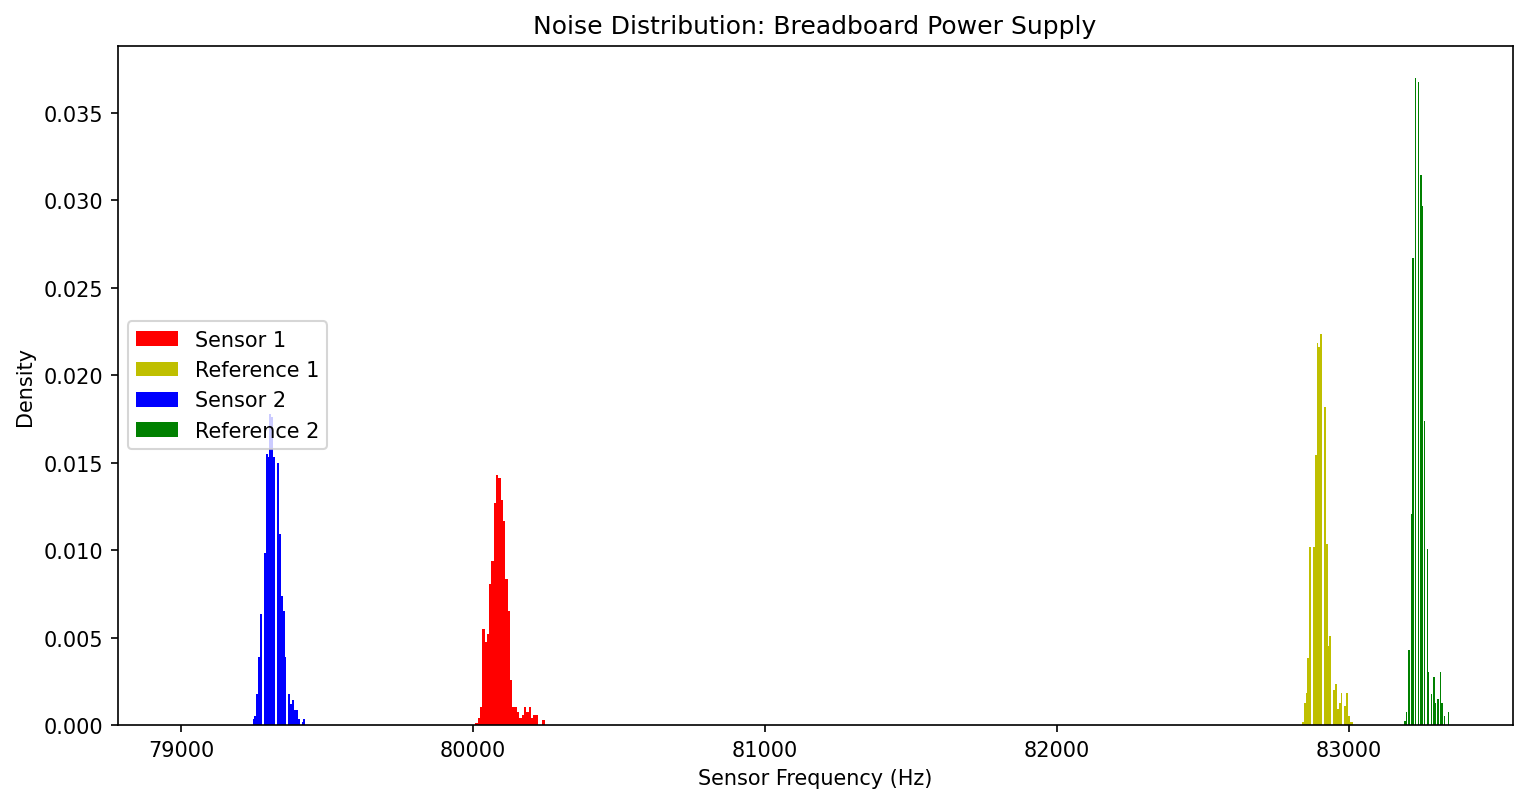

In [9]:
# Breadboard Power noise analysis

bb_hist_sen_1 = plt.figure(figsize=(12, 6), dpi=150)

plt.hist(x=s1_bb[:,3], bins='auto',color='r',range=(79000,81000),density=True,stacked=False,label='Sensor 1')
plt.hist(x=s1_bb[:,4], bins='auto',color='y',density=True,stacked=False,label='Reference 1')

plt.hist(x=s2_bb[:,3], bins='auto',color='b',range=(79000,81000),density=True,stacked=False,label='Sensor 2')
plt.hist(x=s2_bb[:,4], bins='auto',color='g',density=True,stacked=False,label='Reference 2')



plt.xlabel('Sensor Frequency (Hz)')
plt.ylabel('Density')
plt.legend(loc="center left")
plt.title('Noise Distribution: Breadboard Power Supply')
plt.show()

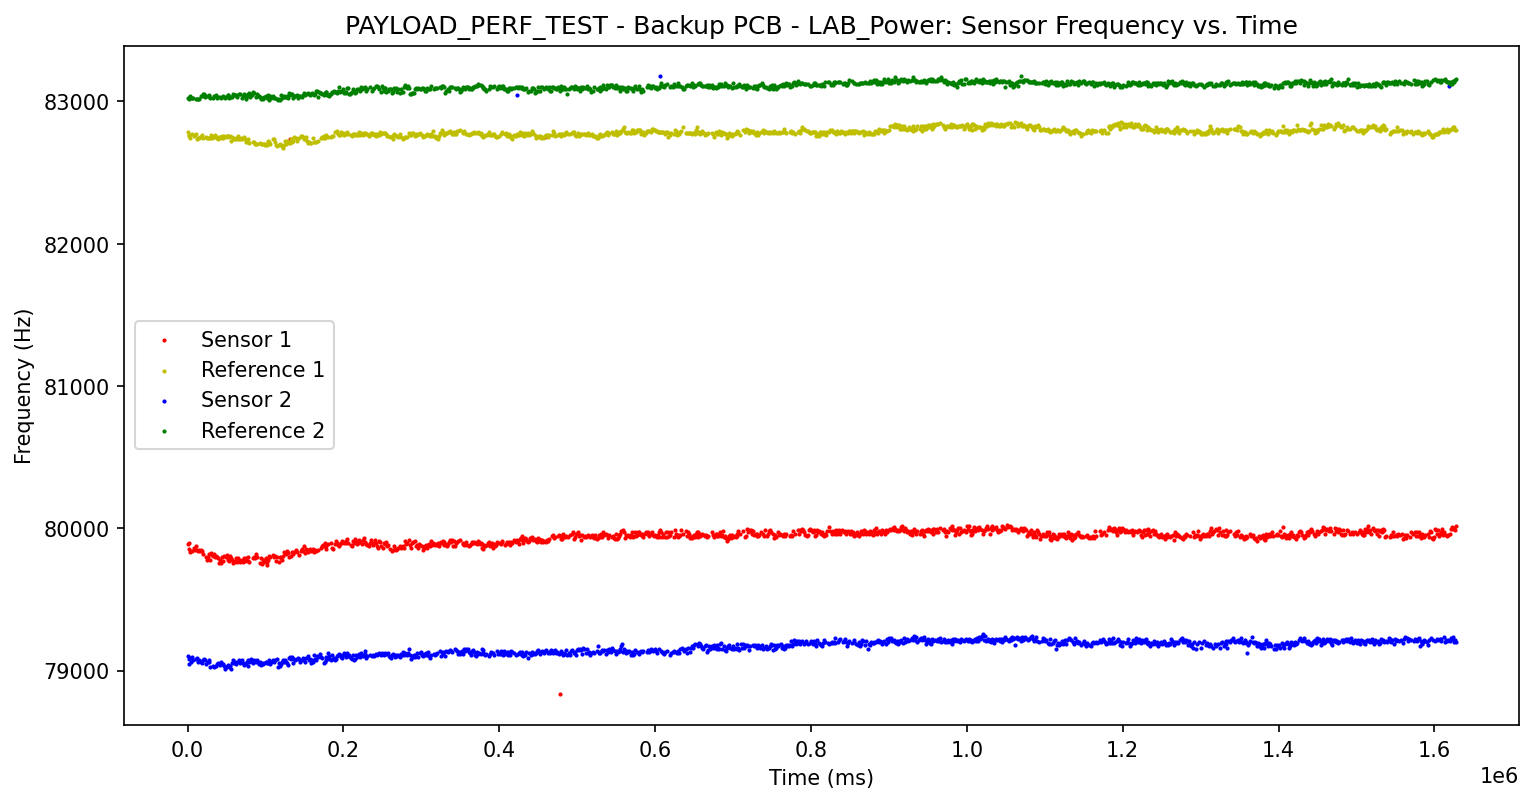

In [10]:
fig_sen_freq_lab = plt.figure(figsize=(12, 6), dpi=150)
plt.scatter(s1_lab[:,0], s1_lab[:,3],s=1, c='r',label = 'Sensor 1')
plt.scatter(s1_lab[:,0], s1_lab[:,4],s=1, c='y',label = 'Reference 1')
plt.scatter(s2_lab[:,0], s2_lab[:,3],s=1, c='b', label = 'Sensor 2')
plt.scatter(s2_lab[:,0], s2_lab[:,4],s=1, c='g',label = 'Reference 2')

plt.xlabel('Time (ms)')
plt.ylabel('Frequency (Hz)')
plt.legend(loc="center left")
plt.title("PAYLOAD_PERF_TEST - Backup PCB - LAB_Power: Sensor Frequency vs. Time")
plt.show()

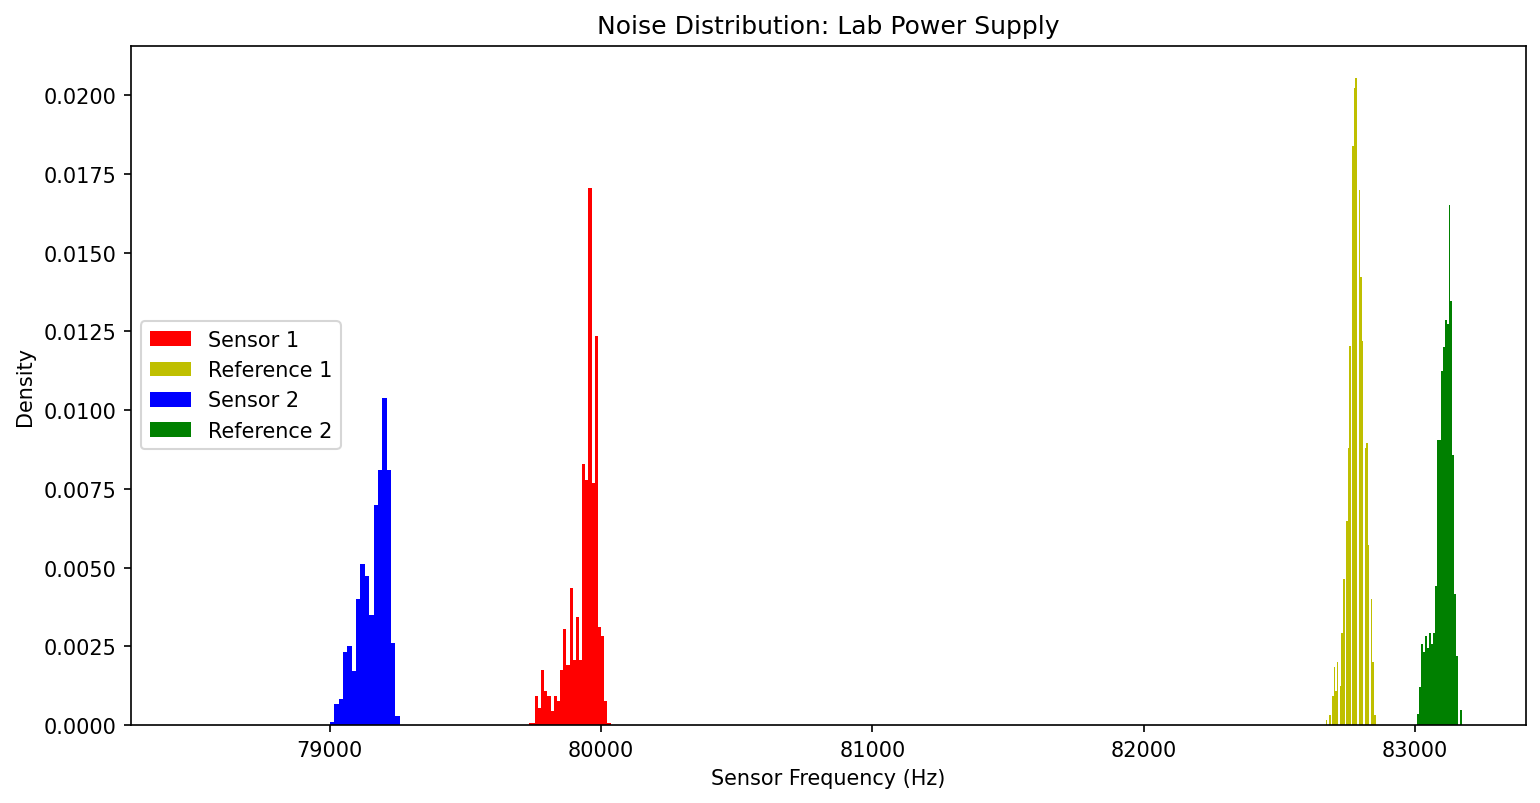

In [11]:
# Lab Power noise analysis

bb_hist_sen_1 = plt.figure(figsize=(12, 6), dpi=150)

plt.hist(x=s1_lab[:,3], bins='auto',color='r',range=(79000,80500),density=True,stacked=False,label='Sensor 1')
plt.hist(x=s1_lab[:,4], bins='auto',color='y',density=True,stacked=False,label='Reference 1')

plt.hist(x=s2_lab[:,3], bins='auto',color='b',range=(78500,80000),density=True,stacked=False,label='Sensor 2')
plt.hist(x=s2_lab[:,4], bins='auto',color='g',density=True,stacked=False,label='Reference 2')



plt.xlabel('Sensor Frequency (Hz)')
plt.ylabel('Density')
plt.legend(loc="center left")
plt.title('Noise Distribution: Lab Power Supply')
plt.show()

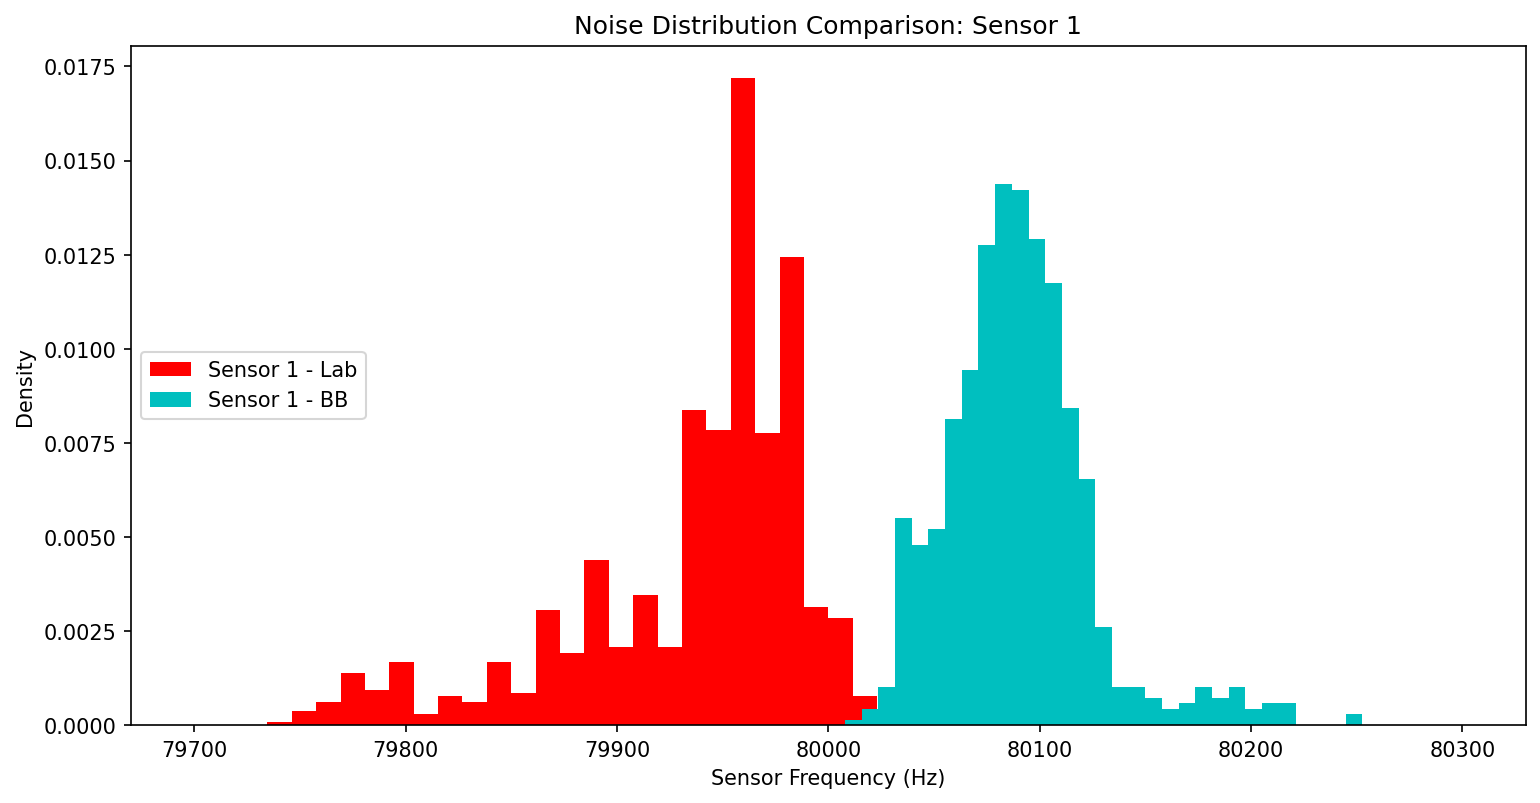

In [22]:
# Noise Comparison - Sensor 1

hist_sen_1 = plt.figure(figsize=(12, 6), dpi=150)

plt.hist(x=s1_lab[:,3], bins='auto',color='r',range=(79700,80300),density=True,stacked=False,label='Sensor 1 - Lab')

plt.hist(x=s1_bb[:,3], bins='auto',color='c',range=(79700,80300),density=True,stacked=False,label='Sensor 1 - BB')



plt.xlabel('Sensor Frequency (Hz)')
plt.ylabel('Density')
plt.legend(loc="center left")
plt.title('Noise Distribution Comparison: Sensor 1')
plt.show()

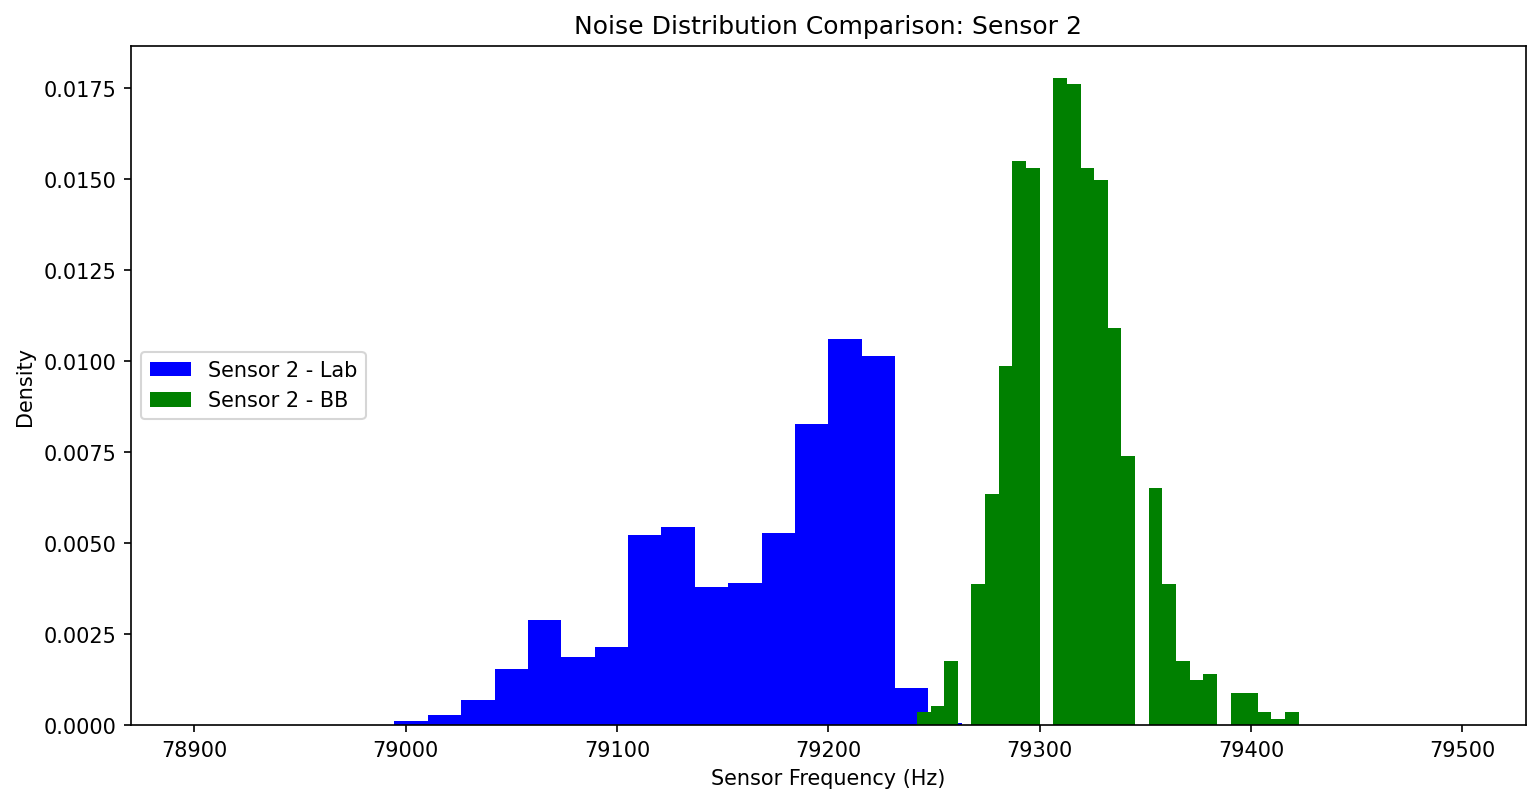

In [24]:
# Noise Comparison - Sensor 2

hist_sen_2 = plt.figure(figsize=(12, 6), dpi=150)

plt.hist(x=s2_lab[:,3], bins='auto',color='b',range=(78900,79500),density=True,stacked=False,label='Sensor 2 - Lab')

plt.hist(x=s2_bb[:,3], bins='auto',color='g',range=(78900,79500),density=True,stacked=False,label='Sensor 2 - BB')



plt.xlabel('Sensor Frequency (Hz)')
plt.ylabel('Density')
plt.legend(loc="center left")
plt.title('Noise Distribution Comparison: Sensor 2')
plt.show()

[79832 79832 79831 ... 79971 79971 79971]


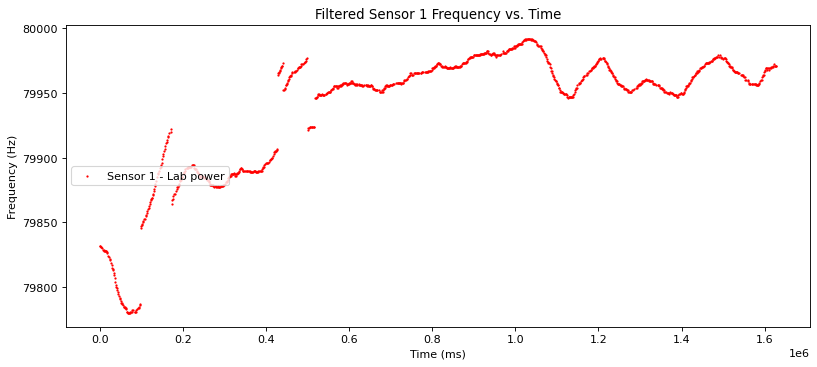

min:  79780
max:  79992
range:  212
mean:  79938.6687279152
sigma filtered:  48.85365009969858


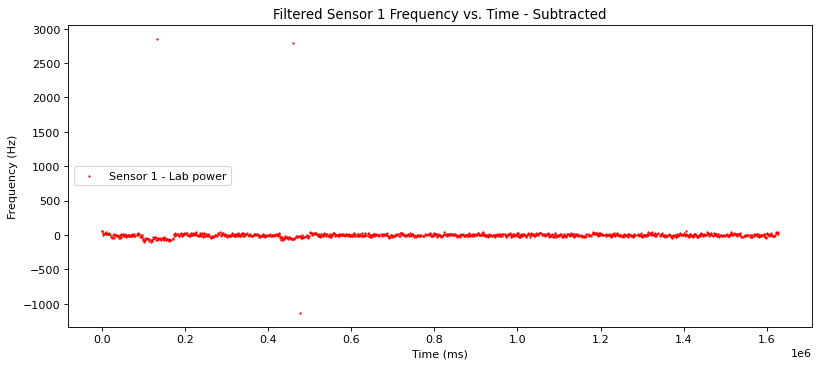

min:  -1135
max:  2857
range:  3992
mean:  0.5424028268551236
sigma subtracted:  125.23156277502282
sigma outliers removed:  21.729947717204784


In [65]:
# Noise Filtering - Sensor 1
# Moving average filter with N point average

from scipy.ndimage.filters import uniform_filter1d

# Number of points used for averaging
N=50
y_1 = uniform_filter1d(s1_lab[:,3].astype(int), size=N)
print(y_1)

fig_s1 = plt.figure(figsize=(12, 5), dpi=80)
plt.scatter(s1_lab[:,0], y_1, s=1, c='r', label = 'Sensor 1 - Lab power')

plt.xlabel('Time (ms)')
plt.ylabel('Frequency (Hz)')
plt.legend(loc="center left")
plt.title("Filtered Sensor 1 Frequency vs. Time")
plt.show()
print('min: ',y_1.min())
print('max: ',y_1.max())
print('range: ',y_1.max()-y_1.min())
print('mean: ',y_1.mean())
print('sigma filtered: ',y_1.std())


#Filtered signal subtracted from original

fig_s1 = plt.figure(figsize=(12, 5), dpi=80)
subbed_1 = (s1_lab[:,3]-y_1)
plt.scatter(s1_lab[:,0], subbed_1, s=1, c='r', label = 'Sensor 1 - Lab power')

plt.xlabel('Time (ms)')
plt.ylabel('Frequency (Hz)')
plt.legend(loc="center left")
plt.title("Filtered Sensor 1 Frequency vs. Time - Subtracted")
plt.show()

print('min: ',subbed_1.min())
print('max: ',subbed_1.max())
print('range: ',subbed_1.max()-subbed_1.min())
print('mean: ',subbed_1.mean())
print('sigma subtracted: ',subbed_1.std())

print('sigma outliers removed: ',(subbed_1[(subbed_1<1000) & (subbed_1>(-1*1000))]).std())


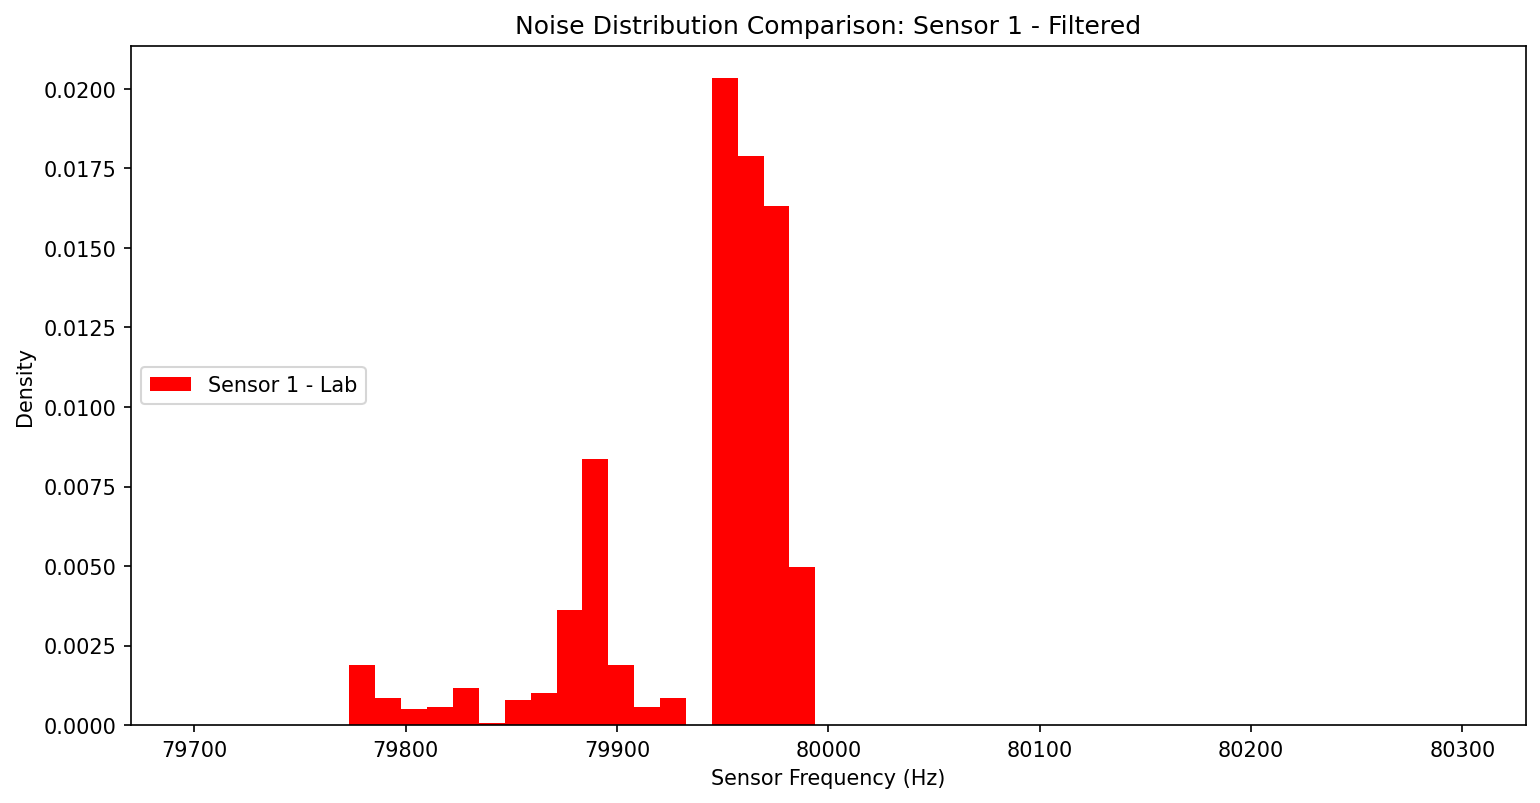

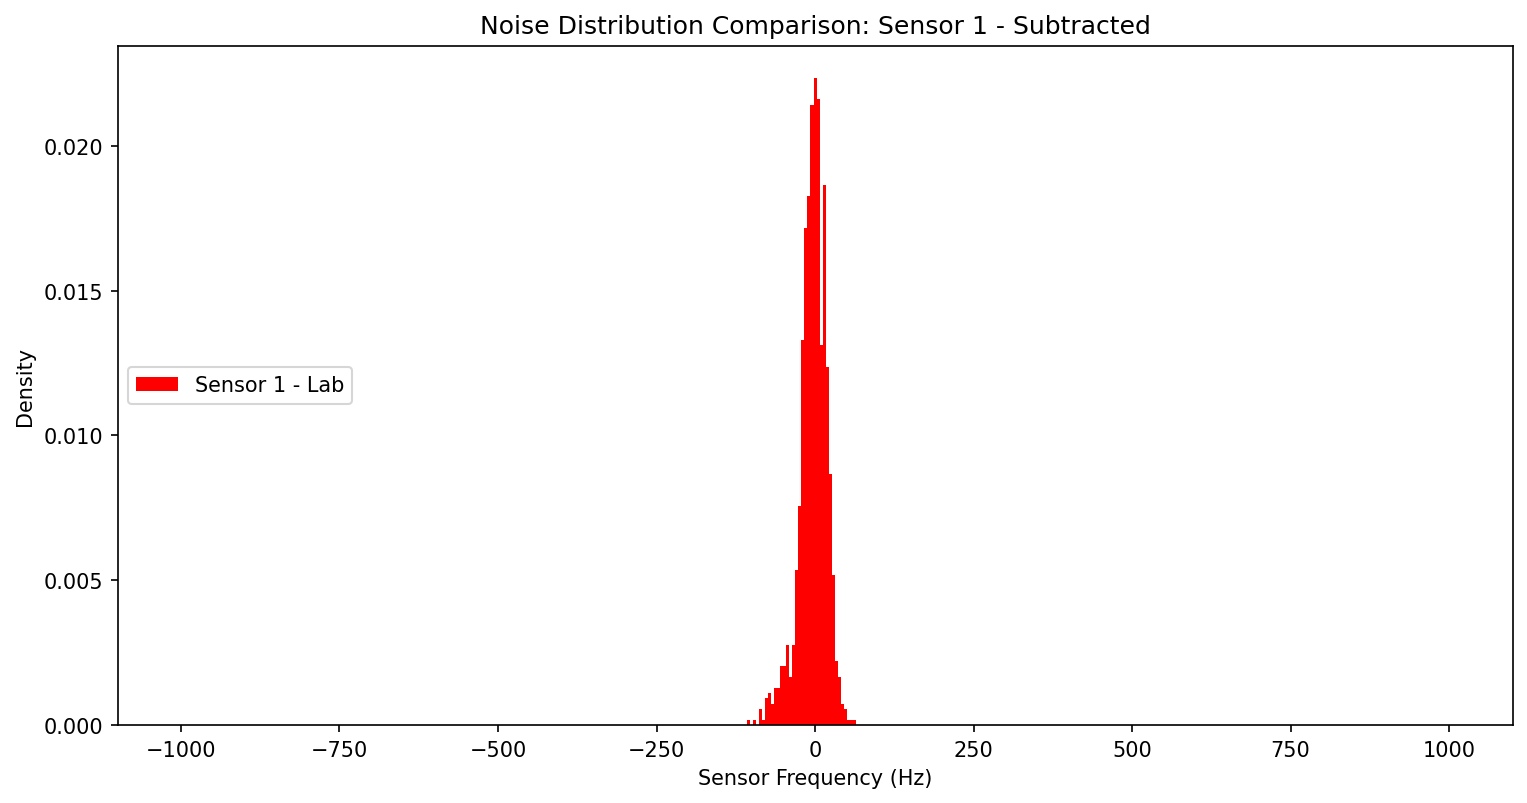

In [74]:
# Histogram of filtered signal - Sensor 1

hist_sen_1_filtered = plt.figure(figsize=(12, 6), dpi=150)

plt.hist(x=y_1, bins='auto',color='r',range=(79700,80300),density=True,stacked=False,label='Sensor 1 - Lab')



plt.xlabel('Sensor Frequency (Hz)')
plt.ylabel('Density')
plt.legend(loc="center left")
plt.title('Noise Distribution Comparison: Sensor 1 - Filtered')
plt.show()



# Histogram of subtracted signal - Sensor 1

hist_sen_1_subbed = plt.figure(figsize=(12, 6), dpi=150)

plt.hist(x=subbed_1, bins='auto',color='r',range=(-1000,1000),density=True,stacked=False,label='Sensor 1 - Lab')



plt.xlabel('Sensor Frequency (Hz)')
plt.ylabel('Density')
plt.legend(loc="center left")
plt.title('Noise Distribution Comparison: Sensor 1 - Subtracted')
plt.show()

[79063 79063 79063 ... 79370 79370 79370]


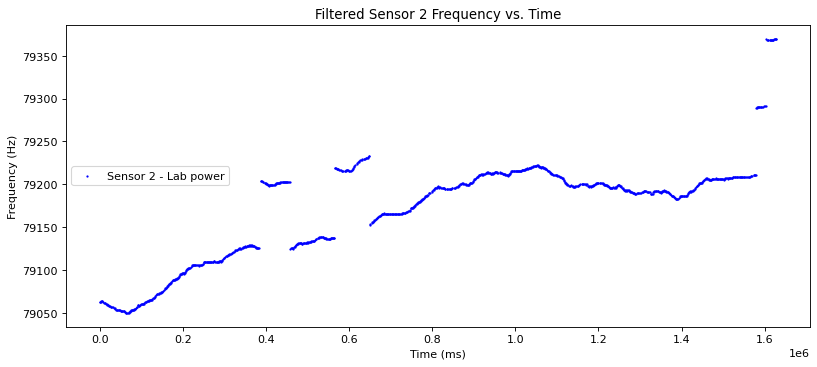

min:  79050
max:  79370
range:  320
mean:  79172.0473637176
sigma filtered:  57.785607963299


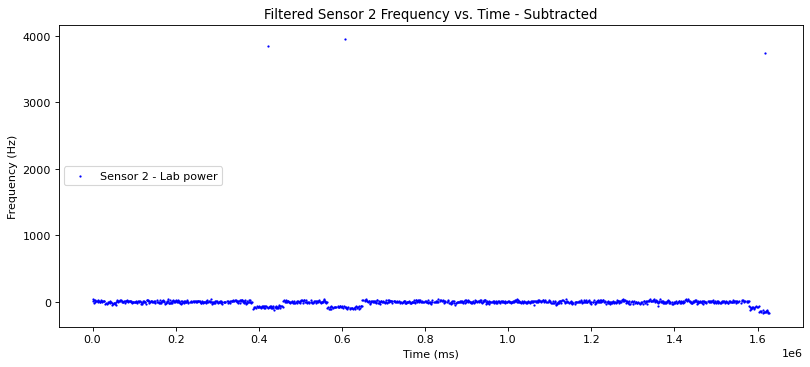

min:  -170
max:  3958
range:  4128
mean:  0.6291331546023236
sigma subtracted:  202.36082296793558
sigma outliers removed:  34.07399595042454


In [95]:
# Noise Filtering - Sensor 2
# Moving average filter with N point average

from scipy.ndimage.filters import uniform_filter1d

# Number of points used for averaging
N=50
y_2 = uniform_filter1d(s2_lab[:,3].astype(int), size=N)
print(y_2)

fig_s2 = plt.figure(figsize=(12, 5), dpi=80)
plt.scatter(s2_lab[:,0], y_2, s=1, c='b', label = 'Sensor 2 - Lab power')

plt.xlabel('Time (ms)')
plt.ylabel('Frequency (Hz)')
plt.legend(loc="center left")
plt.title("Filtered Sensor 2 Frequency vs. Time")
plt.show()
print('min: ',y_2.min())
print('max: ',y_2.max())
print('range: ',y_2.max()-y_2.min())
print('mean: ',y_2.mean())
print('sigma filtered: ',y_2.std())


#Filtered signal subtracted from original

fig_s2 = plt.figure(figsize=(12, 5), dpi=80)
subbed_2 = (s2_lab[:,3]-y_2)
plt.scatter(s2_lab[:,0], subbed_2, s=1, c='b', label = 'Sensor 2 - Lab power')

plt.xlabel('Time (ms)')
plt.ylabel('Frequency (Hz)')
plt.legend(loc="center left")
plt.title("Filtered Sensor 2 Frequency vs. Time - Subtracted")
plt.show()

print('min: ',subbed_2.min())
print('max: ',subbed_2.max())
print('range: ',subbed_2.max()-subbed_2.min())
print('mean: ',subbed_2.mean())
print('sigma subtracted: ',subbed_2.std())

print('sigma outliers removed: ',(subbed_2[(subbed_2<1000) & (subbed_2>(-1*1000))]).std())
#print('sigma outliers removed: ',(subbed_2[(subbed_2<500) & (subbed_2>(-1*500))]).std())

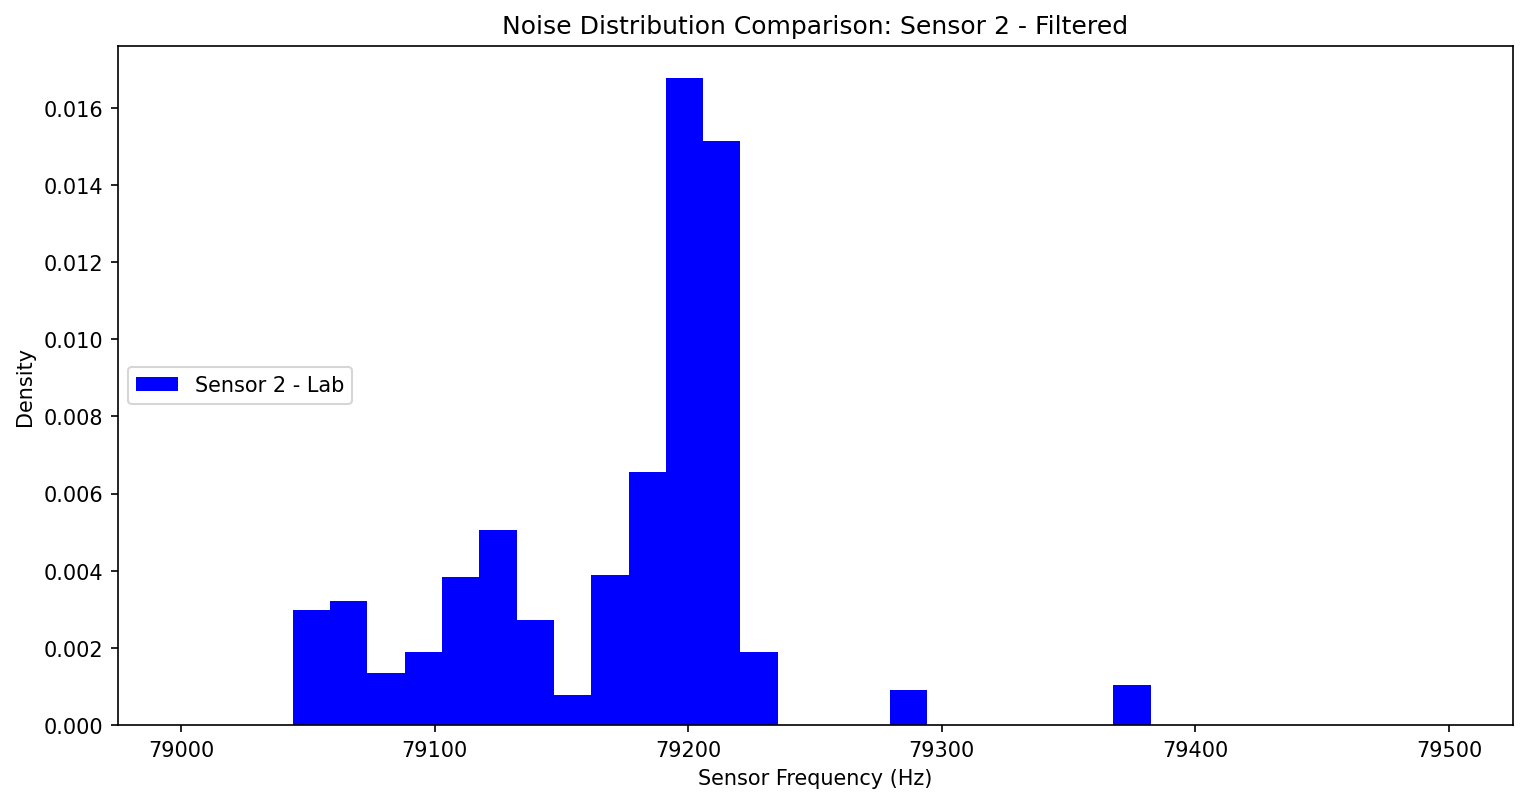

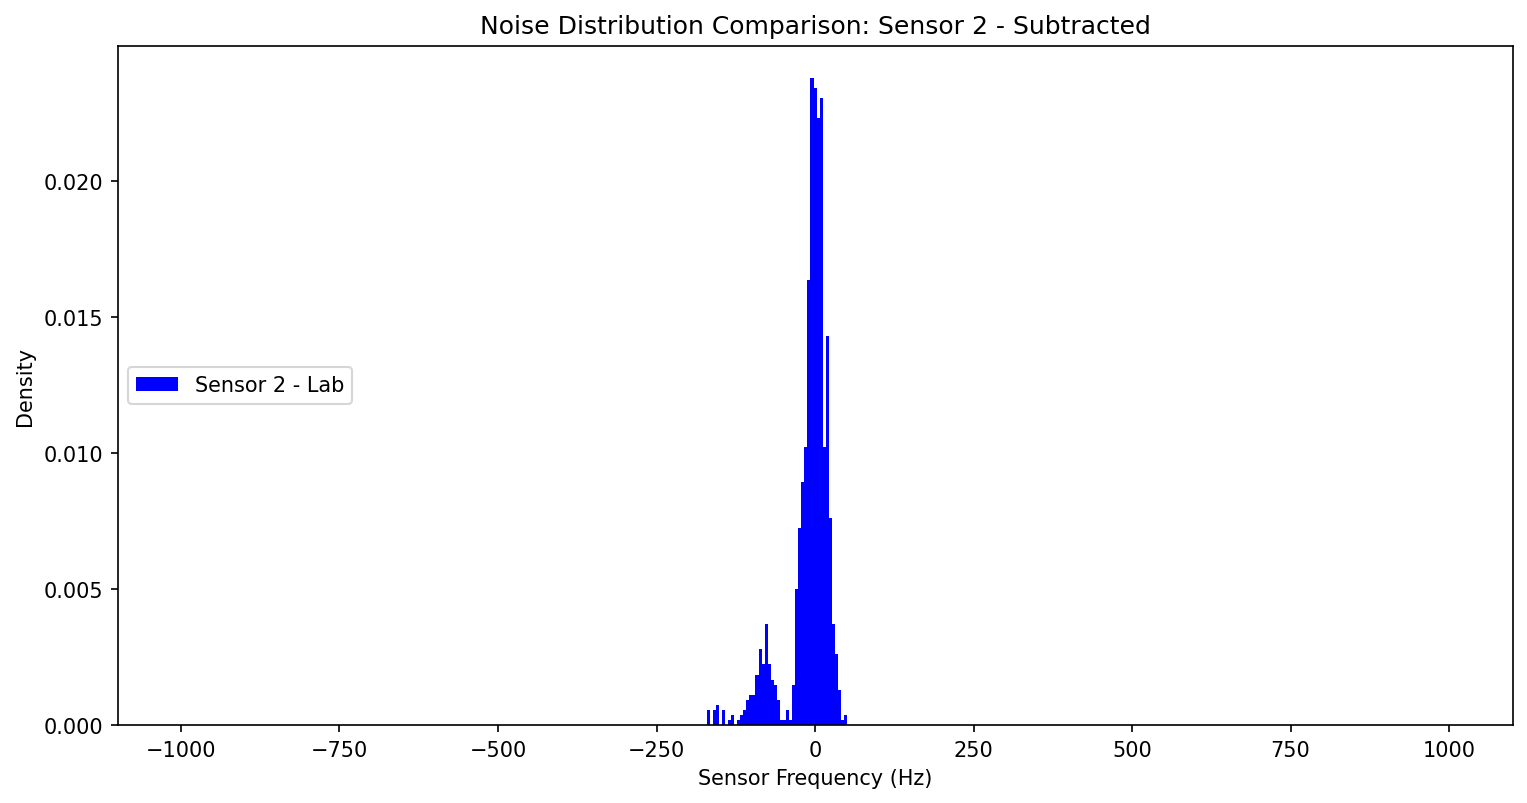

In [92]:
# Histogram of filtered signal - Sensor 2

hist_sen_2_filtered = plt.figure(figsize=(12, 6), dpi=150)

plt.hist(x=y_2, bins='auto',color='b',range=(79000,79500),density=True,stacked=False,label='Sensor 2 - Lab')



plt.xlabel('Sensor Frequency (Hz)')
plt.ylabel('Density')
plt.legend(loc="center left")
plt.title('Noise Distribution Comparison: Sensor 2 - Filtered')
plt.show()



# Histogram of subtracted signal - Sensor 2

hist_sen_2_subbed = plt.figure(figsize=(12, 6), dpi=150)

plt.hist(x=subbed_2, bins='auto',color='b',range=(-1000,1000),density=True,stacked=False,label='Sensor 2 - Lab')



plt.xlabel('Sensor Frequency (Hz)')
plt.ylabel('Density')
plt.legend(loc="center left")
plt.title('Noise Distribution Comparison: Sensor 2 - Subtracted')
plt.show()

In [16]:
#To be continued

- sigma and noise calc - Brucoli & De Meyere ref
- normal distribution or KDE 

SyntaxError: invalid syntax (Temp/ipykernel_11360/3712141105.py, line 3)

In [87]:
(s2_lab[-1,0]-s2_lab[0,0])/(1000)
#np.size(s2_lab,0)

1627.4095441999998

In [88]:
10*(1627/1119)

14.53976764968722

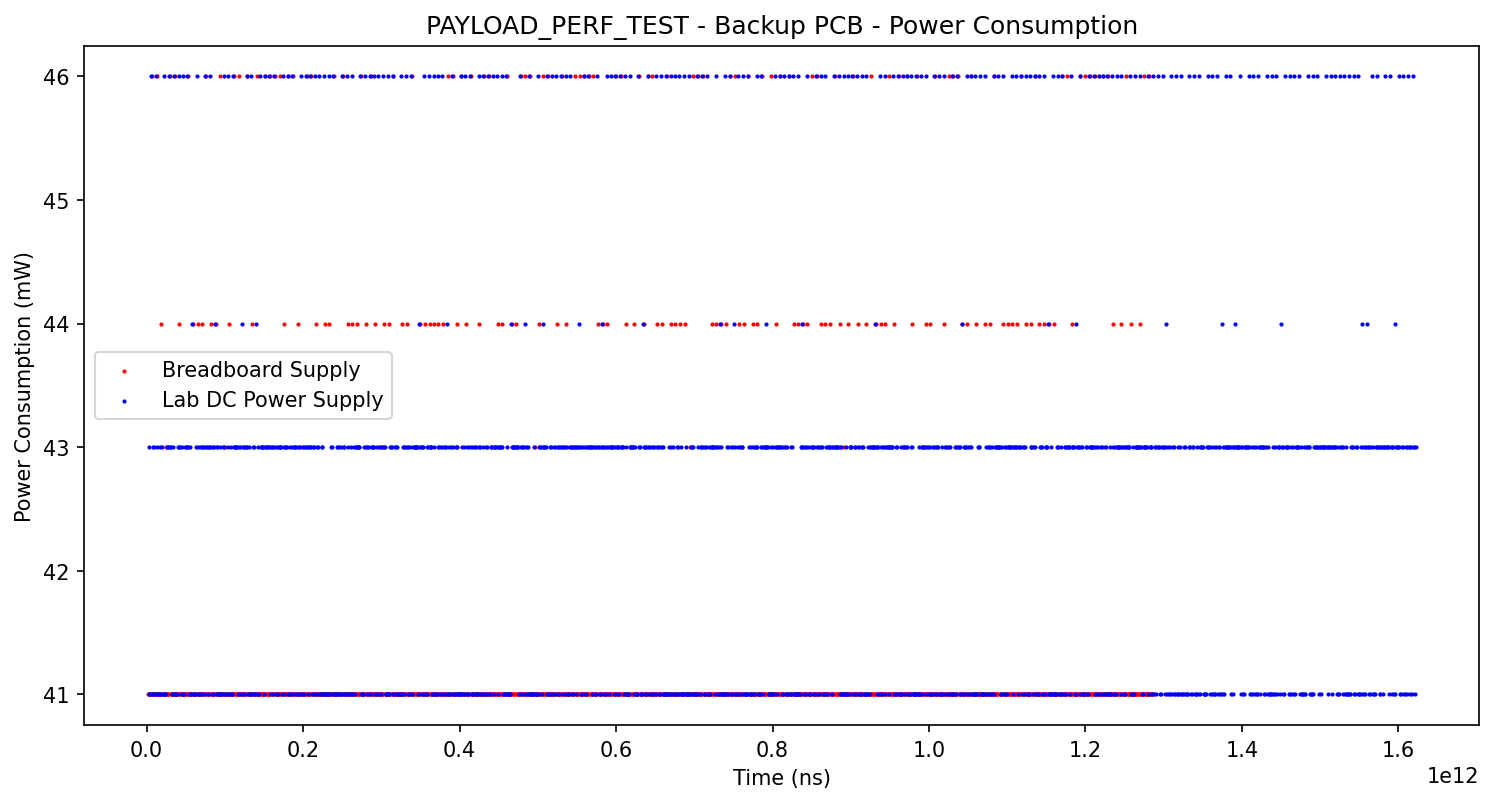

In [17]:
fig_sen_freq_lab = plt.figure(figsize=(12, 6), dpi=150)
plt.scatter(bb_power[:,0], bb_power[:,5],s=1, c='r',label = 'Breadboard Supply')
plt.scatter(lab_power[:,0], lab_power[:,5],s=1, c='b', label = 'Lab DC Power Supply')

plt.xlabel('Time (ns)')
plt.ylabel('Power Consumption (mW)')
plt.legend(loc="center left")
plt.title("PAYLOAD_PERF_TEST - Backup PCB - Power Consumption")
plt.show()

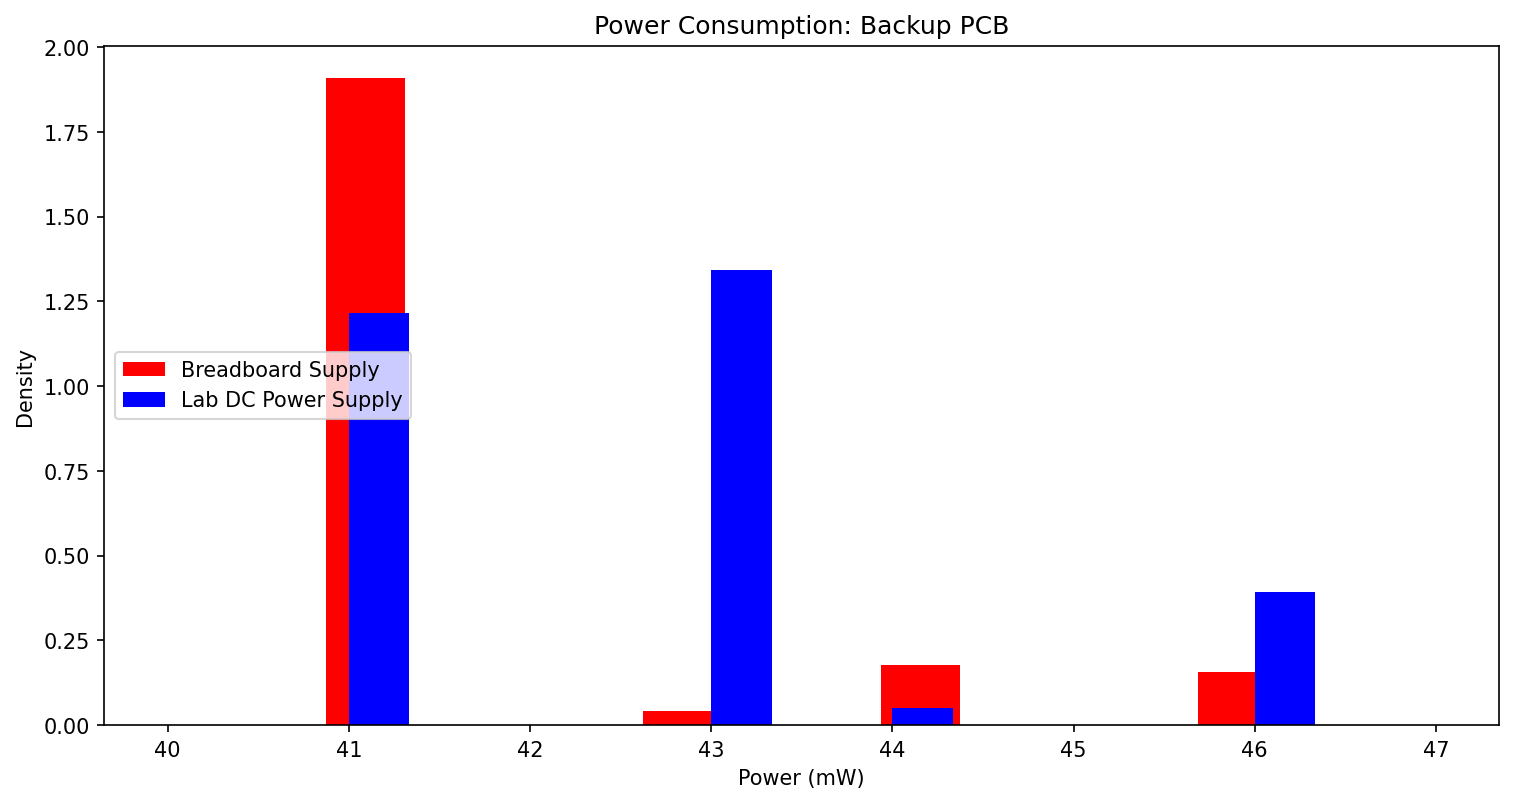

In [20]:
hist_power = plt.figure(figsize=(12, 6), dpi=150)

plt.hist(x=bb_power[:,5], bins='auto',color='r',range=(40,47),density=True,stacked=False,label='Breadboard Supply')
plt.hist(x=lab_power[:,5], bins='auto',color='b',range=(40,47),density=True,stacked=False,label='Lab DC Power Supply')



plt.xlabel('Power (mW)')
plt.ylabel('Density')
plt.legend(loc="center left")
plt.title('Power Consumption: Backup PCB')
plt.show()

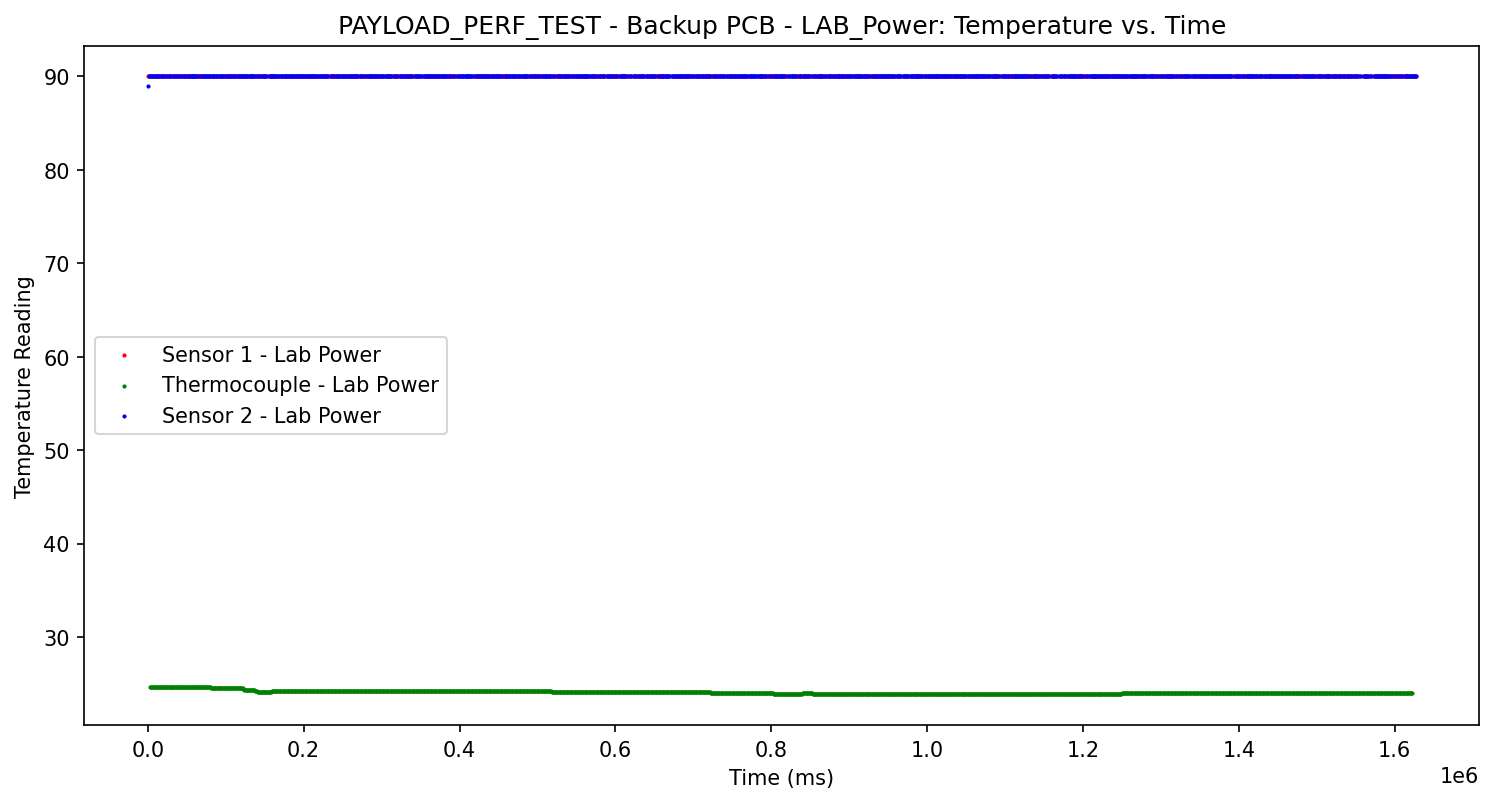

In [18]:
# Internal Temperature Monitor Calibration against Themrocouple Measurements - Powered by Lab Supply

fig_temp_calib = plt.figure(figsize=(12, 6), dpi=150)
plt.scatter(s1_lab[:,0], s1_lab[:,2],s=1, c='r',label = 'Sensor 1 - Lab Power')
plt.scatter(lab_power[:,0]*(1e-6), lab_power[:,6],s=1, c='g',label = 'Thermocouple - Lab Power')
plt.scatter(s2_lab[:,0], s2_lab[:,2],s=1, c='b', label = 'Sensor 2 - Lab Power')
#plt.xlim(0,1e6)

plt.xlabel('Time (ms)')
plt.ylabel('Temperature Reading')
plt.legend(loc="center left")
plt.title("PAYLOAD_PERF_TEST - Backup PCB - LAB_Power: Temperature vs. Time")
plt.show()